Import Library

In [ ]:
# Import library-library yang dibutuhkan
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
import seaborn as sns
import pandas as pd
import numpy as np
import scipy

In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/myDrive/Colab Notebooks/Dataset.csv/ '):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Data Description

In [ ]:
data = pd.read_csv("Dataset.csv")
data

,NIM,Program Studi,Semester,IPK,Angkatan (Tahun Masuk),Pekerjaan Ayah,Pekerjaan Ibu,Penghasilan Kotor Ayah/perbulan,Penghasilan Kotor Ibu/perbulan,Jumlah Anggota Keluarga Yang ditanggung,Label
0,12019130002,S1 Matematika,3,3.85,2019,Wiraswasta,Ibu Rumah Tangga,3000000,0,3,T
1,1520182015,D3 Kebidanan,5,3.59,2018,Wiraswasta,Ibu Rumah Tangga,1000000,0,2,T
2,2020181004,D3 Keperawatan,5,2.98,2018,Wiraswasta,Ibu Rumah Tangga,1000000,1000000,1,Y
3,52019050043,S1 Farmasi,3,3.10,2019,Wiraswasta,Ibu Rumah Tangga,3000000,0,1,Y
4,F420185015,S1 Farmasi,5,3.06,2018,Tenaga Honorer,Ibu Rumah Tangga,1500000,0,1,Y
...,...,...,...,...,...,...,...,...,...,...,...
772,212019010027,D3 Keperawatan,3,3.35,2019,Petani,Guru,100000,100000,3,T
773,12019120003,S1 Pgsd,3,3.55,2019,Buruh Harian Lepas,Wiraswasta,0,1000000,1,T
774,112019030093,S1 Keperawatan,3,2.60,2019,Guru,Karyawan Swasta,1000000,500000,5,T
775,1020183110,S1 Keperawatan,5,2.85,2018,Tidak Bekerja,PNS,0,3000000,3,T


In [ ]:
# Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   NIM                                      777 non-null    object 
 1   Program Studi                            777 non-null    object 
 2   Semester                                 777 non-null    int64  
 3   IPK                                      777 non-null    float64
 4   Angkatan (Tahun Masuk)                   777 non-null    int64  
 5   Pekerjaan Ayah                           777 non-null    object 
 6   Pekerjaan Ibu                            777 non-null    object 
 7   Penghasilan Kotor Ayah/perbulan          777 non-null    int64  
 8   Penghasilan Kotor Ibu/perbulan           777 non-null    int64  
 9   Jumlah Anggota Keluarga Yang ditanggung  777 non-null    int64  
 10  Label                                    777 non-n

In [ ]:
#Data Informasi
data.shape

(777, 11)

In [ ]:
#Data Informasi
data.columns

Index(['NIM', 'Program Studi', 'Semester', 'IPK', 'Angkatan (Tahun Masuk)',
       'Pekerjaan Ayah', 'Pekerjaan Ibu', 'Penghasilan Kotor Ayah/perbulan',
       'Penghasilan Kotor Ibu/perbulan',
       'Jumlah Anggota Keluarga Yang ditanggung', 'Label'],
      dtype='object')

In [ ]:
# Mendeskripsikan data yang terdapat pada dataset
data.describe()

,Semester,IPK,Angkatan (Tahun Masuk),Penghasilan Kotor Ayah/perbulan,Penghasilan Kotor Ibu/perbulan,Jumlah Anggota Keluarga Yang ditanggung
count,777.000000,777.000000,777.000000,7.770000e+02,7.770000e+02,777.000000
mean,4.343629,3.169331,2018.333333,1.654835e+06,7.477323e+05,1.972973
std,1.463143,0.237392,0.732763,1.121924e+06,1.055638e+06,1.091457
min,3.000000,2.230000,2017.000000,0.000000e+00,0.000000e+00,0.000000
25%,3.000000,3.000000,2018.000000,1.000000e+06,0.000000e+00,1.000000
50%,5.000000,3.170000,2018.000000,1.500000e+06,4.000000e+05,2.000000
75%,5.000000,3.330000,2019.000000,2.000000e+06,1.000000e+06,2.000000
max,7.000000,3.850000,2020.000000,1.000000e+07,1.000000e+07,8.000000


In [ ]:
# Menghitung banyaknya data yang null pada dataset
data.isna().sum()

NIM                                        0
Program Studi                              0
Semester                                   0
IPK                                        0
Angkatan (Tahun Masuk)                     0
Pekerjaan Ayah                             0
Pekerjaan Ibu                              0
Penghasilan Kotor Ayah/perbulan            0
Penghasilan Kotor Ibu/perbulan             0
Jumlah Anggota Keluarga Yang ditanggung    0
Label                                      0
dtype: int64

Mengkontruksi Data

In [ ]:
# Menambahkan kolom baru
data['Total Penghasilan'] = data['Penghasilan Kotor Ayah/perbulan'] + data['Penghasilan Kotor Ibu/perbulan']
data

,NIM,Program Studi,Semester,IPK,Angkatan (Tahun Masuk),Pekerjaan Ayah,Pekerjaan Ibu,Penghasilan Kotor Ayah/perbulan,Penghasilan Kotor Ibu/perbulan,Jumlah Anggota Keluarga Yang ditanggung,Label,Total Penghasilan
0,12019130002,S1 Matematika,3,3.85,2019,Wiraswasta,Ibu Rumah Tangga,3000000,0,3,T,3000000
1,1520182015,D3 Kebidanan,5,3.59,2018,Wiraswasta,Ibu Rumah Tangga,1000000,0,2,T,1000000
2,2020181004,D3 Keperawatan,5,2.98,2018,Wiraswasta,Ibu Rumah Tangga,1000000,1000000,1,Y,2000000
3,52019050043,S1 Farmasi,3,3.10,2019,Wiraswasta,Ibu Rumah Tangga,3000000,0,1,Y,3000000
4,F420185015,S1 Farmasi,5,3.06,2018,Tenaga Honorer,Ibu Rumah Tangga,1500000,0,1,Y,1500000
...,...,...,...,...,...,...,...,...,...,...,...,...
772,212019010027,D3 Keperawatan,3,3.35,2019,Petani,Guru,100000,100000,3,T,200000
773,12019120003,S1 Pgsd,3,3.55,2019,Buruh Harian Lepas,Wiraswasta,0,1000000,1,T,1000000
774,112019030093,S1 Keperawatan,3,2.60,2019,Guru,Karyawan Swasta,1000000,500000,5,T,1500000
775,1020183110,S1 Keperawatan,5,2.85,2018,Tidak Bekerja,PNS,0,3000000,3,T,3000000


In [ ]:
# Menambahkan kolom baru
data['Alokasi Penghasilan per Anak'] = data['Total Penghasilan'] / data['Jumlah Anggota Keluarga Yang ditanggung']
data['Alokasi Penghasilan per Anak']

0      1.000000e+06
1      5.000000e+05
2      2.000000e+06
3      3.000000e+06
4      1.500000e+06
           ...     
772    6.666667e+04
773    1.000000e+06
774    3.000000e+05
775    1.000000e+06
776    1.000000e+06
Name: Alokasi Penghasilan per Anak, Length: 777, dtype: float64

### Klasifikasi Kelayakan Menggunakan Nilai Mean

In [ ]:
kelayakan = []

for x in data["Alokasi Penghasilan per Anak"]:
  if x > 1410614: # Nilai Mean Alokasi Penghasilan per Anak
    kelayakan.append('0') #NON BEASISWA
  else:
    kelayakan.append('1') #BEASISWA (1)

data["Kelayakan"] = kelayakan
data["Kelayakan"]

0      1
1      1
2      0
3      0
4      0
      ..
772    1
773    1
774    1
775    1
776    1
Name: Kelayakan, Length: 777, dtype: object

In [ ]:
# Mendeskripsikan data yang terdapat pada dataset
data.describe()

,Semester,IPK,Angkatan (Tahun Masuk),Penghasilan Kotor Ayah/perbulan,Penghasilan Kotor Ibu/perbulan,Jumlah Anggota Keluarga Yang ditanggung,Total Penghasilan,Alokasi Penghasilan per Anak
count,777.000000,777.000000,777.000000,7.770000e+02,7.770000e+02,777.000000,7.770000e+02,7.740000e+02
mean,4.343629,3.169331,2018.333333,1.654835e+06,7.477323e+05,1.972973,2.402567e+06,inf
std,1.463143,0.237392,0.732763,1.121924e+06,1.055638e+06,1.091457,1.594872e+06,NaN
min,3.000000,2.230000,2017.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,3.000000,3.000000,2018.000000,1.000000e+06,0.000000e+00,1.000000,1.500000e+06,7.500000e+05
50%,5.000000,3.170000,2018.000000,1.500000e+06,4.000000e+05,2.000000,2.000000e+06,1.091667e+06
75%,5.000000,3.330000,2019.000000,2.000000e+06,1.000000e+06,2.000000,3.000000e+06,2.000000e+06
max,7.000000,3.850000,2020.000000,1.000000e+07,1.000000e+07,8.000000,1.600000e+07,inf


Membersihkan Data

In [ ]:
# Menghitung banyaknya data yang null pada dataset
data.isna().sum()

NIM                                        0
Program Studi                              0
Semester                                   0
IPK                                        0
Angkatan (Tahun Masuk)                     0
Pekerjaan Ayah                             0
Pekerjaan Ibu                              0
Penghasilan Kotor Ayah/perbulan            0
Penghasilan Kotor Ibu/perbulan             0
Jumlah Anggota Keluarga Yang ditanggung    0
Label                                      0
Total Penghasilan                          0
Alokasi Penghasilan per Anak               3
Kelayakan                                  0
dtype: int64

In [ ]:
data.dropna(how='any',inplace=True)
data

,NIM,Program Studi,Semester,IPK,Angkatan (Tahun Masuk),Pekerjaan Ayah,Pekerjaan Ibu,Penghasilan Kotor Ayah/perbulan,Penghasilan Kotor Ibu/perbulan,Jumlah Anggota Keluarga Yang ditanggung,Label,Total Penghasilan,Alokasi Penghasilan per Anak,Kelayakan
0,12019130002,S1 Matematika,3,3.85,2019,Wiraswasta,Ibu Rumah Tangga,3000000,0,3,T,3000000,1.000000e+06,1
1,1520182015,D3 Kebidanan,5,3.59,2018,Wiraswasta,Ibu Rumah Tangga,1000000,0,2,T,1000000,5.000000e+05,1
2,2020181004,D3 Keperawatan,5,2.98,2018,Wiraswasta,Ibu Rumah Tangga,1000000,1000000,1,Y,2000000,2.000000e+06,0
3,52019050043,S1 Farmasi,3,3.10,2019,Wiraswasta,Ibu Rumah Tangga,3000000,0,1,Y,3000000,3.000000e+06,0
4,F420185015,S1 Farmasi,5,3.06,2018,Tenaga Honorer,Ibu Rumah Tangga,1500000,0,1,Y,1500000,1.500000e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,212019010027,D3 Keperawatan,3,3.35,2019,Petani,Guru,100000,100000,3,T,200000,6.666667e+04,1
773,12019120003,S1 Pgsd,3,3.55,2019,Buruh Harian Lepas,Wiraswasta,0,1000000,1,T,1000000,1.000000e+06,1
774,112019030093,S1 Keperawatan,3,2.60,2019,Guru,Karyawan Swasta,1000000,500000,5,T,1500000,3.000000e+05,1
775,1020183110,S1 Keperawatan,5,2.85,2018,Tidak Bekerja,PNS,0,3000000,3,T,3000000,1.000000e+06,1


### Drop Missing Value

In [ ]:
data["Jumlah Anggota Keluarga Yang ditanggung"].value_counts()[0]

23

In [ ]:
data.drop(data[data["Jumlah Anggota Keluarga Yang ditanggung"] == 0].index, inplace=True)

Data Splitting (Menentukan Objek Data)

In [ ]:
selected = ["Semester","IPK", "Angkatan (Tahun Masuk)","Penghasilan Kotor Ayah/perbulan", "Penghasilan Kotor Ibu/perbulan","Jumlah Anggota Keluarga Yang ditanggung","Total Penghasilan","Alokasi Penghasilan per Anak","Kelayakan"]
data_selected = data[selected]

X = data_selected.drop(columns="Kelayakan").values # atribut
Y = data_selected["Kelayakan"].values #kelas/target

In [ ]:
data_selected

,Semester,IPK,Angkatan (Tahun Masuk),Penghasilan Kotor Ayah/perbulan,Penghasilan Kotor Ibu/perbulan,Jumlah Anggota Keluarga Yang ditanggung,Total Penghasilan,Alokasi Penghasilan per Anak,Kelayakan
0,3,3.85,2019,3000000,0,3,3000000,1.000000e+06,1
1,5,3.59,2018,1000000,0,2,1000000,5.000000e+05,1
2,5,2.98,2018,1000000,1000000,1,2000000,2.000000e+06,0
3,3,3.10,2019,3000000,0,1,3000000,3.000000e+06,0
4,5,3.06,2018,1500000,0,1,1500000,1.500000e+06,0
...,...,...,...,...,...,...,...,...,...
772,3,3.35,2019,100000,100000,3,200000,6.666667e+04,1
773,3,3.55,2019,0,1000000,1,1000000,1.000000e+06,1
774,3,2.60,2019,1000000,500000,5,1500000,3.000000e+05,1
775,5,2.85,2018,0,3000000,3,3000000,1.000000e+06,1


In [ ]:
print(X.shape)
print(Y.shape)

(751, 8)
(751,)


In [ ]:
#Import library yang dibutuhkan
from sklearn import model_selection

#Mendefinisikan ukuran testing data dan seed untuk random state
test_size = 0.30
seed = 7
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y,test_size = test_size,random_state=seed)

Normalisasi Data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() #melakukan penskalaan agar nilai dan rentang data antar atribut sama besarnya
x_train = sc.fit_transform(X_train)
x_test = sc.fit_transform(X_test)

Membangun Skenario Model

In [ ]:
#Melakukan import beberapa library berisi algoritma klasifikasi yang akan digunakan
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#Membuat array kosong untuk menampung beberapa algoritma klasifikasi
models = []

#Membuat array asosiatif berisi nama algoritma dan algoritma klasifikasinya
models.append(('Decision Tree',DecisionTreeClassifier()))
models.append(('SVM',SVC()))
models.append(('Gaussian Naive Bayes',GaussianNB()))
models.append(('KNN',KNeighborsClassifier(n_neighbors = 7, metric = 'euclidean')))

Membangun dan Menguji Model

In [ ]:
#Mendefinisikan ssed dan scoring yang digunakan untuk menguji model dengan validation data
seed = 7
scoring = 'accuracy'
results = []
names = []

#Membagi data menjadi traning dan validation set menggunakan k-fold cross validation, dengan k = 10
for name, model in models:
  kfold = model_selection.KFold(n_splits=7, random_state = seed, shuffle = True)

  #Menguji akurasi dari masing-masing model menggunakan validasi data
  cv_results = model_selection.cross_val_score(model,x_train,y_train.ravel(),cv=kfold,scoring = scoring)
  results.append(cv_results)
  msg = "%s : %f (%f)" % (name,cv_results.mean(),cv_results.std())
  print(msg)

Decision Tree : 1.000000 (0.000000)
SVM : 0.975238 (0.014998)
Gaussian Naive Bayes : 0.942857 (0.023328)
KNN : 0.923810 (0.034706)


In [ ]:
#Menggunakan Decision Tree Classifier dengan kriteria splitting Gini impurity untuk membentuk model
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=None)


# fit model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(x_train,y_train)

SVC()

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
!pip install scikit-plot
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[[ 88   1]
 [  1 136]]


<Axes: title={'center': 'Confusion Matrix for GBC'}, xlabel='Predicted label', ylabel='True label'>

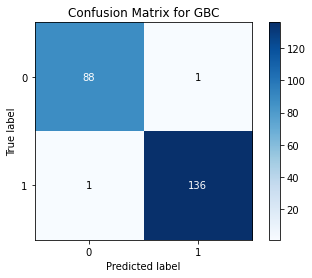

In [ ]:
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
cm = confusion_matrix(y_test,y_pred)
print(cm)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, title = 'Confusion Matrix for GBC')

Visualisasi Data

<Axes: >

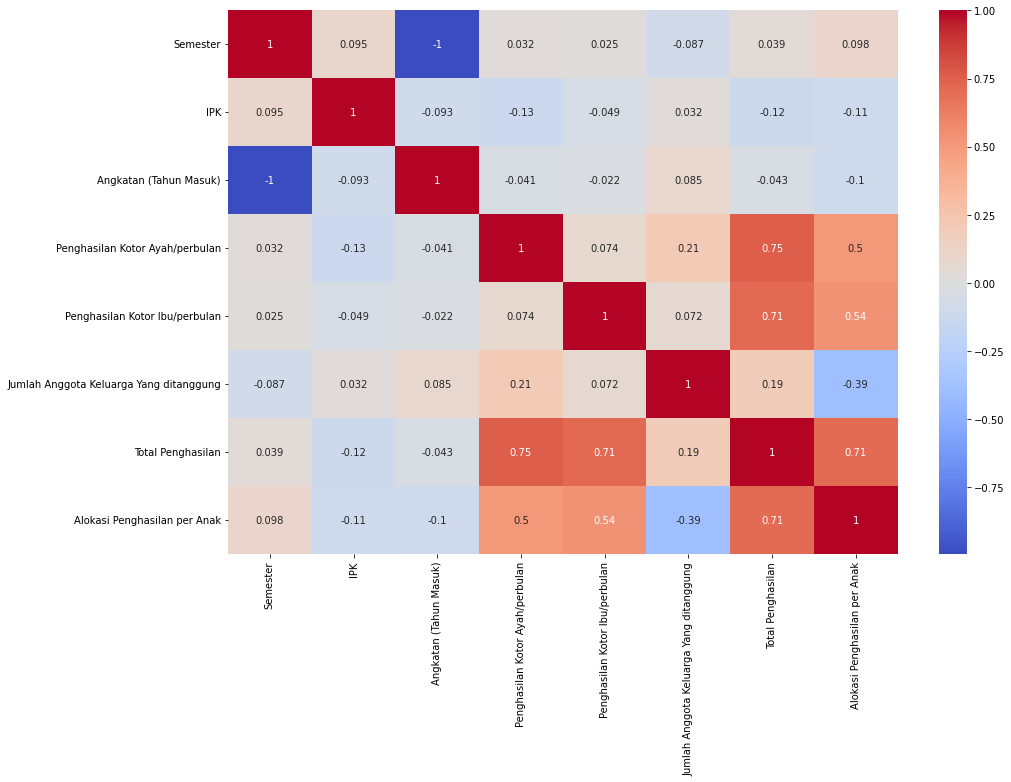

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True,cmap='coolwarm')

[Text(0.5, 0.75, 'x[7] <= 1433333.312\ngini = 0.484\nsamples = 525\nvalue = [215, 310]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 310\nvalue = [0, 310]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 215\nvalue = [215, 0]')]

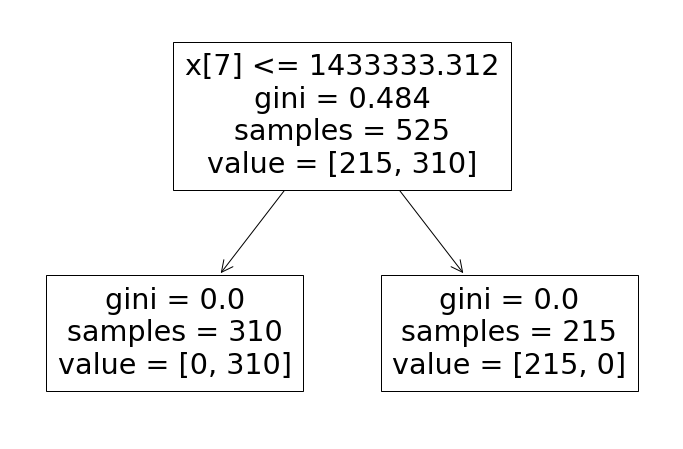

In [ ]:
#Plot the tree
plt.figure(figsize=(12,8))

tree.plot_tree(clf_gini.fit(X_train, y_train))

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.ioff()>

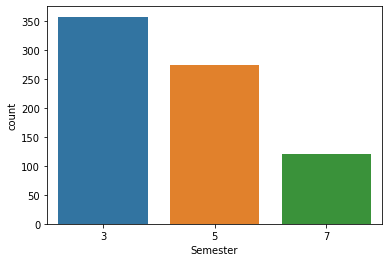

In [ ]:
sns.countplot(data['Semester'])
plt.ioff

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.ioff()>

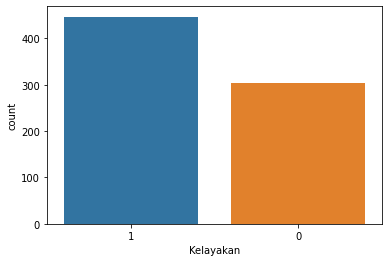

In [ ]:
sns.countplot(data['Kelayakan'])
plt.ioff

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


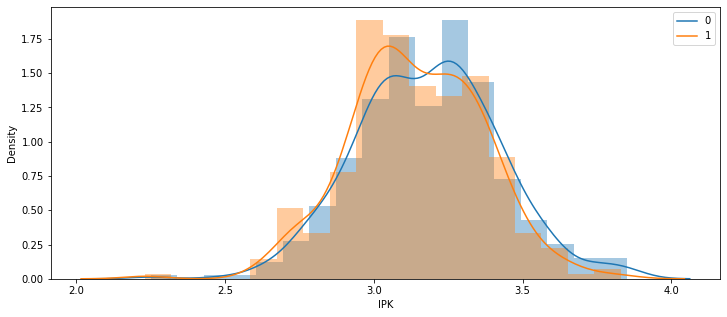

In [ ]:
for col in ['IPK']:
    plt.figure(figsize=(12,5))
    sns.distplot(data[col][data.Kelayakan=='1']) #-> Bivariate condition
    sns.distplot(data[col][data.Kelayakan=='0'])
    plt.legend(['0','1'])
    plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


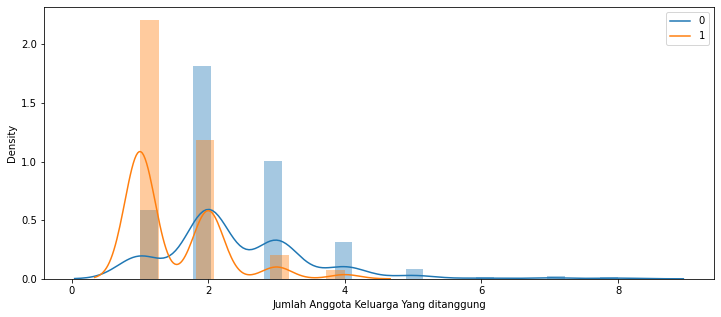

In [ ]:
for col in ['Jumlah Anggota Keluarga Yang ditanggung']:
    plt.figure(figsize=(12,5))
    sns.distplot(data[col][data.Kelayakan=='1']) #-> Bivariate condition
    sns.distplot(data[col][data.Kelayakan=='0'])
    plt.legend(['0','1'])
    plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


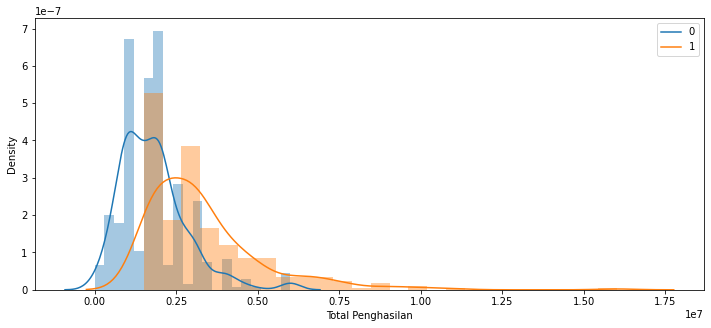

In [ ]:
for col in ['Total Penghasilan']:
    plt.figure(figsize=(12,5))
    sns.distplot(data[col][data.Kelayakan=='1']) #-> Bivariate condition
    sns.distplot(data[col][data.Kelayakan=='0'])
    plt.legend(['0','1'])
    plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


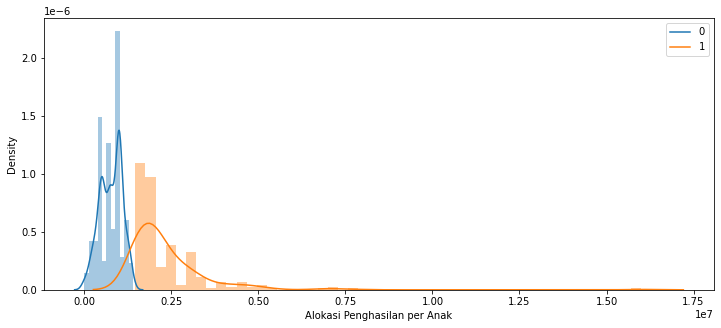

In [ ]:
for col in ['Alokasi Penghasilan per Anak']:
    plt.figure(figsize=(12,5))
    sns.distplot(data[col][data.Kelayakan=='1']) #-> Bivariate condition
    sns.distplot(data[col][data.Kelayakan=='0'])
    plt.legend(['0','1'])
    plt.show()

Mengevaluasi Hasil Permodelan

In [ ]:
matrix = classification_report(y_test,y_pred,labels=[1,0])
print('<--------------- Classification report --------------->\n', matrix)

<--------------- Classification report --------------->
               precision    recall  f1-score   support

           1       0.99      0.99      0.99       137
           0       0.99      0.99      0.99        89

   micro avg       0.99      0.99      0.99       226
   macro avg       0.99      0.99      0.99       226
weighted avg       0.99      0.99      0.99       226



/usr/local/lib/python3.9/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.9/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.9/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.9/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


In [ ]:
# informasi yang didapatkan dari klasifikasi
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
hasil = classifier.predict(x_test)
print('accuracy score :',accuracy_score(hasil,y_test))
print('Precision Score :',precision_score(y_test, hasil, pos_label='1'))
print('Recall score :',recall_score(y_test, hasil,pos_label='1'))
print('F1 score :',f1_score(y_test, hasil,pos_label='1'))

accuracy score : 0.9911504424778761
Precision Score : 0.9927007299270073
Recall score : 0.9927007299270073
F1 score : 0.9927007299270073
